In [1]:
# import necessary python packages
import numpy as np
import matplotlib.pyplot as plt

# make it so that plots will appear in-line in your notebook (i.e., next to the code)
%matplotlib inline 

Suppose we want to plot the graph of a piecewise function $f(x)$. This notebook will show you how to do so in Python, first using the example
$$
f(x) = \begin{cases}
    0  \quad & 0 \leqslant x < 5 \, , \\
    1  \quad & 5 \leqslant x < 20 \, , \\
    0  \quad & x \geqslant 20 \, .
\end{cases}
$$

This example is pretty simple in terms of plotting, as it just comes down to plotting horizontal lines over a certain range of values. We can do this directly without defining a function `f(x)` in Python, as shown below.

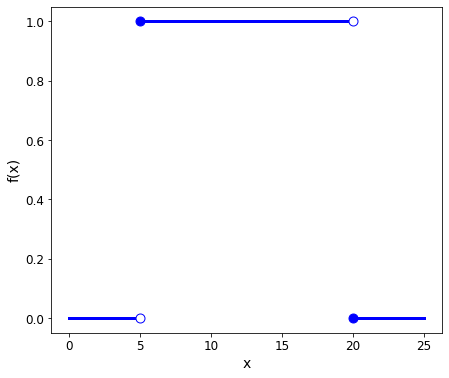

In [52]:
plt.figure(figsize=(7,6)) # set the dimensions of your figures

# plot values of the function over different intervals
plt.plot([0,4.99],[0,0],'b-',linewidth=3) 
plt.plot([5,19.99],[1,1],'b-',linewidth=3) 
plt.plot([20,25],[0,0],'b-',linewidth=3) 

# plot open vs closed circles at discontinuities
plt.plot(5,0,ls='',marker='o',ms=9,markerfacecolor='white',markeredgecolor='blue') # plot open circle at point (5,0)
plt.plot(5,1,ls='',marker='o',ms=9,markerfacecolor='blue',markeredgecolor='blue') # plot closed circle at point (5,1)
plt.plot(20,1,ls='',marker='o',ms=9,markerfacecolor='white',markeredgecolor='blue') # plot open circle at point (20,1)
plt.plot(20,0,ls='',marker='o',ms=9,markerfacecolor='blue',markeredgecolor='blue') # plot closed circle at point (20,0)

plt.xlabel('x',fontsize=14) # label x axis
plt.ylabel('f(x)',fontsize=14) # label y axis
plt.xticks(fontsize=12); # set fontsize for markers on x axis
plt.yticks(fontsize=12); # set fontsize for markers on y axis

plt.savefig('plot_piecewise1.png',dpi=400) # save your figure as a png with resolution 400 dpi

What if we had a more complicated piecewise continuous function? For example, consider the function:
 $$
f(x) = \begin{cases}
    x-1  \quad & 0 \leqslant x < 4 \, , \\
    0.25(x-8)^2  \quad & 4 \leqslant x < 12 \, , \\
    1  \quad & x \geqslant 12 \, .
\end{cases}
$$
The following cells will show you how we can go about plotting this function in Python.

#### Step 1: Define your function $f$
In order to plot the graph of our function $f(x)$, we must first define a Python function that takes values of `x` and outputs the value of `f(x)`, as defined above. We could using what are called <i> conditional statements </i>, e.g., `if` and `else`.

In [45]:
def f(x):
    if 0 <= x < 4: # if x is in this interval...
        return x-1 # f(x) = x-1
    elif 4 <= x < 12: # else, if x is in this interval...
        return 0.25*(x-8)**2 # f(x) = 0.25(x-8)^2
    else: # else, x >= 12, so...
        return 1 # f(x) = 1

#### Step 2: Define the numerical range of $x$
Once we have defined our function `f(x)`, we must specify the range of `x` over which we are going to plot the graph of $f$. In particular, we must specify it as an arrays of points
$$
(x_0, x_1, x_2,\dots, x_n)
$$
so that we can plot $(x_i, f(x_i))$ at each value $x_i$. Notice that in our definition of the function `f(x)`, we did not specify that the input `x` had to be positive. For this example, we do not need to do so, because we can simply plot `f(x)` over a numerical range that only includes values greater than or equal to zero. In this example, we will to plot the graph for $0 \leq x \leq 16$, and will do so over `num`=250 points on this interval.

In [40]:
x = np.linspace(0,16,250)

#### Step 3: Plot your graph

The function `f(x)` that we defined above is not <i> vectorized </i>; this means that it is only written to take in one number at a time (as opposed to acting on an entire array of numbers at once). In order to input our array of points into this function, we have to use the built-in Python function `map`, which applies our function to each point in the array and returns an array of the corresponding outputs.

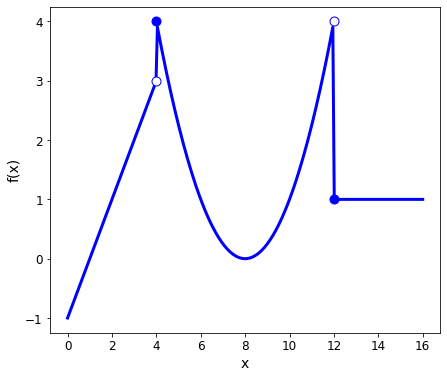

In [53]:
plt.figure(figsize=(7,6)) # set the dimensions of your figures

plt.plot(x,list(map(f,x)),'b-',linewidth=3) # plot the function f

plt.plot(4,3,ls='',marker='o',ms=9,markerfacecolor='white',markeredgecolor='blue') # plot open circle at point (4,3)
plt.plot(4,4,ls='',marker='o',ms=9,markerfacecolor='blue',markeredgecolor='blue') # plot closed circle at point (4,4)
plt.plot(12,4,ls='',marker='o',ms=9,markerfacecolor='white',markeredgecolor='blue') # plot open circle at point (12,4)
plt.plot(12,1,ls='',marker='o',ms=9,markerfacecolor='blue',markeredgecolor='blue') # plot closed circle at point (12,1)

plt.xlabel('x',fontsize=14) # label x axis
plt.ylabel('f(x)',fontsize=14) # label y axis
plt.xticks(fontsize=12); # set fontsize for markers on x axis
plt.yticks(fontsize=12); # set fontsize for markers on y axis

What if we don't want the line of the graph to show up between the discontinuous points? Using <i>array slicing</i>...

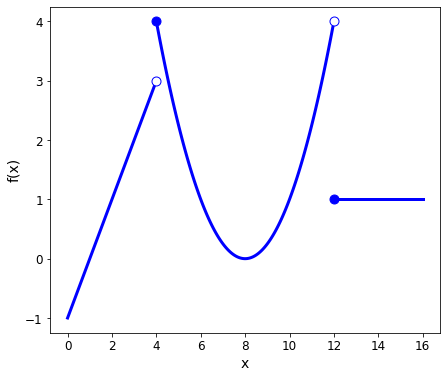

In [55]:
plt.figure(figsize=(7,6)) # set the dimensions of your figures

plt.plot(x[x<4],list(map(f,x[x<4])),'b-',linewidth=3) # plot f for values of x < 4
plt.plot(x[(x>=4)&(x<12)],list(map(f,x[(x>=4)&(x<12)])),'b-',linewidth=3) # plot f for values of x >= 4 and < 12
plt.plot(x[x>=12],list(map(f,x[x>=12])),'b-',linewidth=3) # plot f for values of x >= 12

plt.plot(4,3,ls='',marker='o',ms=9,markerfacecolor='white',markeredgecolor='blue') # plot open circle at point (4,3)
plt.plot(4,4,ls='',marker='o',ms=9,markerfacecolor='blue',markeredgecolor='blue') # plot closed circle at point (4,4)
plt.plot(12,4,ls='',marker='o',ms=9,markerfacecolor='white',markeredgecolor='blue') # plot open circle at point (12,4)
plt.plot(12,1,ls='',marker='o',ms=9,markerfacecolor='blue',markeredgecolor='blue') # plot closed circle at point (12,1)

plt.xlabel('x',fontsize=14) # label x axis
plt.ylabel('f(x)',fontsize=14) # label y axis
plt.xticks(fontsize=12); # set fontsize for markers on x axis
plt.yticks(fontsize=12); # set fontsize for markers on y axis

plt.savefig('plot_piecewise2.png',dpi=400) # save your figure as a png with resolution 400 dpi

Another example; this time the function $f$ is
$$
f(x) = \begin{cases}
    \displaystyle \frac{1}{x-1}  \quad & 0 \leqslant x < 1 \, , \\
    2  \quad & 1 \leqslant x < 5 \, , \\
    x+2  \quad & x \geqslant 5 \, .
\end{cases}
$$

In [2]:
def f(x):
    if 0 <= x < 1: # if x is in this interval...
        return 1/(x-1) # f(x) = 1/(x-1)
    elif 1 <= x < 5: # else, if x is in this interval...
        return 2 # f(x) = 2
    else: # else, x >= 5, so...
        return x+2 # f(x) = x+2

In [11]:
x = np.linspace(0,10,200)

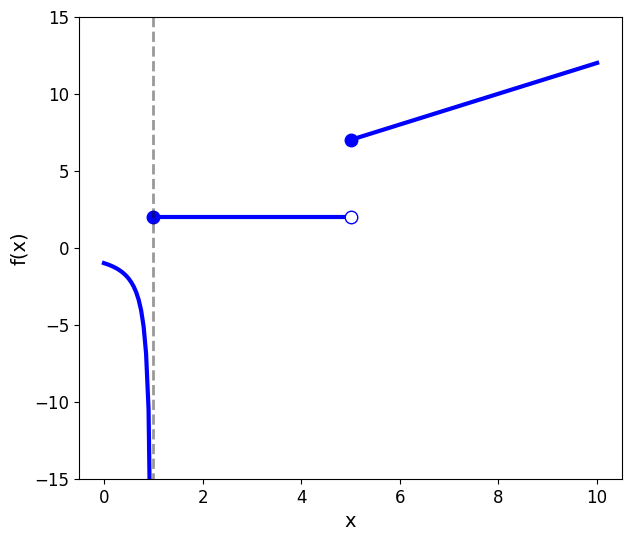

In [18]:
plt.figure(figsize=(7,6)) # set the dimensions of your figures

plt.plot(x[x<1],list(map(f,x[x<1])),'b-',linewidth=3) # plot f for values of x < 4
plt.plot(x[(x>=1)&(x<5)],list(map(f,x[(x>=1)&(x<5)])),'b-',linewidth=3) # plot f for values of x >= 4 and < 12
plt.plot(x[x>=5],list(map(f,x[x>=5])),'b-',linewidth=3) # plot f for values of x >= 12

plt.plot(1,2,ls='',marker='o',ms=9,markerfacecolor='blue',markeredgecolor='blue') # plot closed circle at point (1,2)
plt.plot(5,2,ls='',marker='o',ms=9,markerfacecolor='white',markeredgecolor='blue') # plot open circle at point (5,2)
plt.plot(5,7,ls='',marker='o',ms=9,markerfacecolor='blue',markeredgecolor='blue') # plot closed circle at point (5,7)

plt.plot([1,1],[-35,20],'k--',linewidth=2,alpha=0.4) # plot dashed line at x = 1 (vertical asymptote)

plt.ylim([-15,15])
plt.xlabel('x',fontsize=14) # label x axis
plt.ylabel('f(x)',fontsize=14) # label y axis
plt.xticks(fontsize=12); # set fontsize for markers on x axis
plt.yticks(fontsize=12); # set fontsize for markers on y axis

plt.savefig('plot_piecewise3.png',dpi=400) # save your figure as a png with resolution 400 dpi